<a href="https://colab.research.google.com/github/roycanchica79/skills-introduction-to-github/blob/dependabot%2Fgithub_actions%2Factions%2Fcheckout-4/bootcamp%2Croy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
!pip install lazypredict
import lazypredict as lp

# librerias

In [138]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Lectura de datos

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')





In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Descripción estadística de las variables categoricas
categorical_summary = train.describe(include=['object'])
categorical_summary

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [12]:
# Descripción estadística de las variables numéricas
numerical_summary = train.describe()
numerical_summary


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


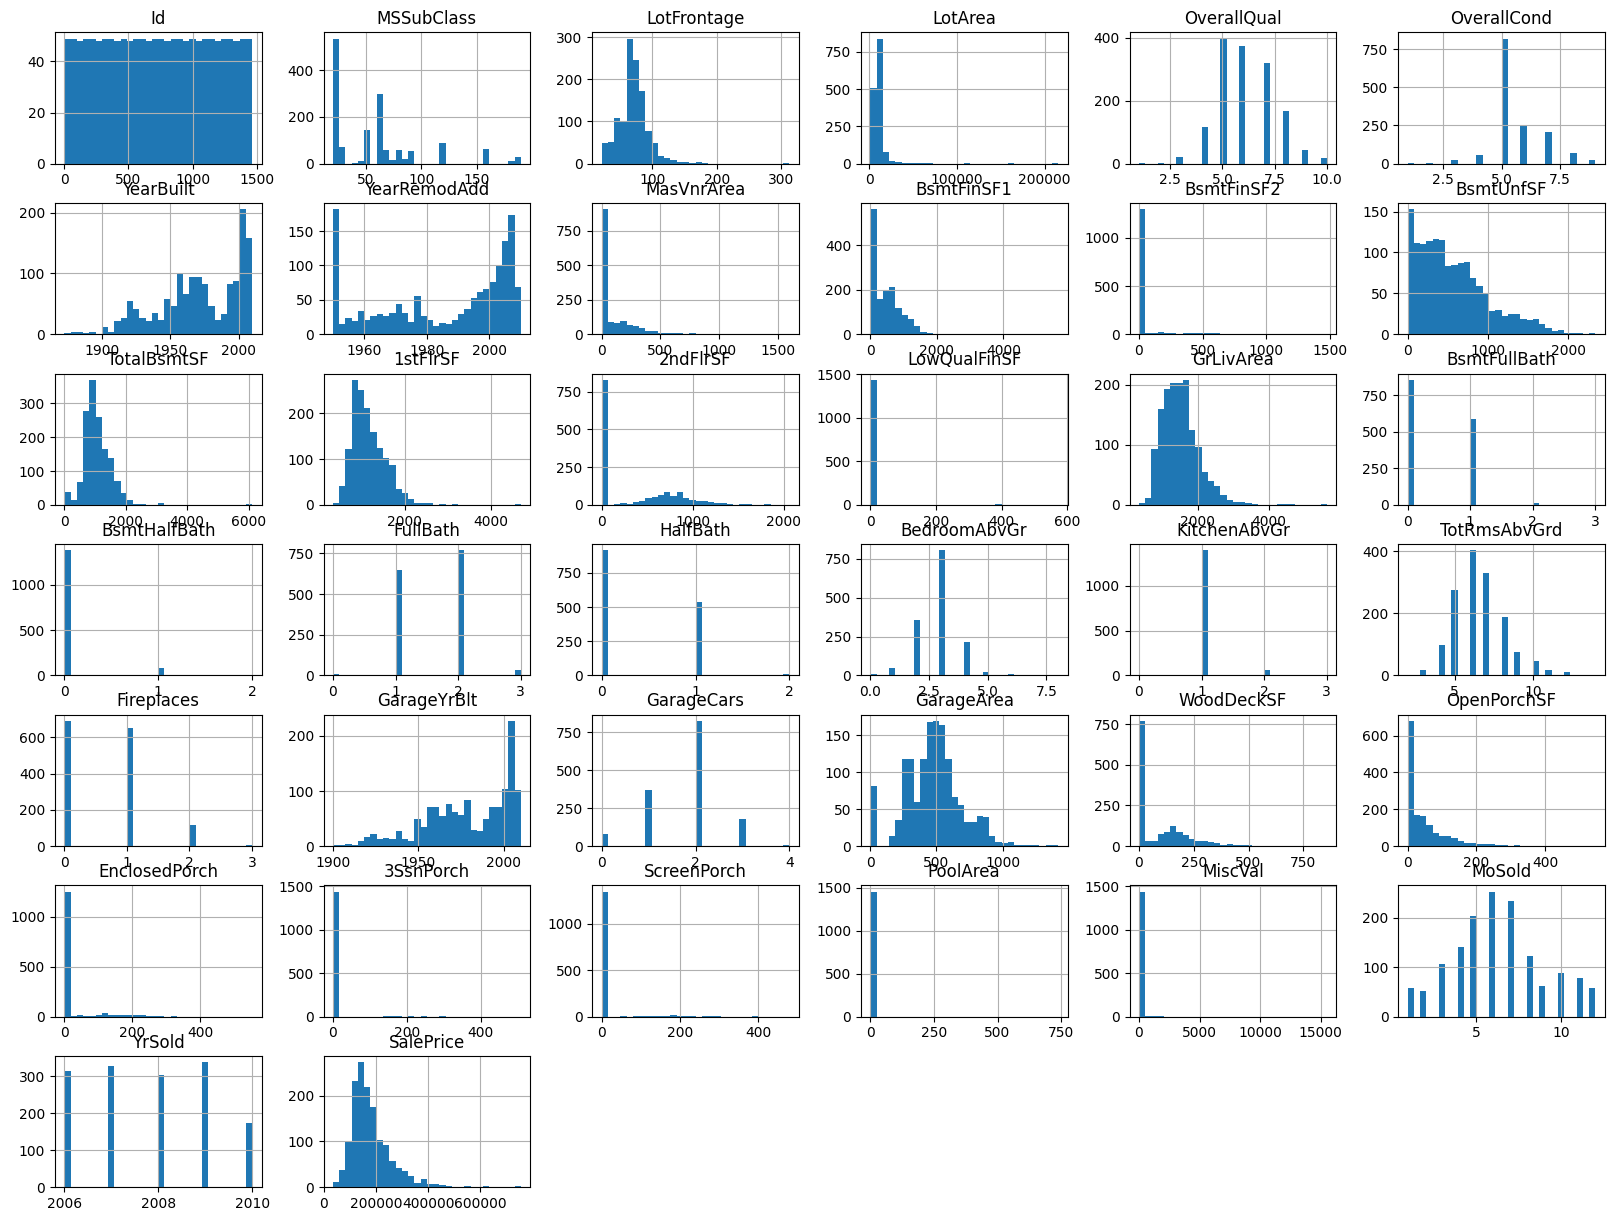

In [13]:
# Visualización de la distribución de las variables numéricas
train.hist(bins=30, figsize=(20, 15))
plt.show()

Correlación entre las variables numéricas

Matriz de Correlación

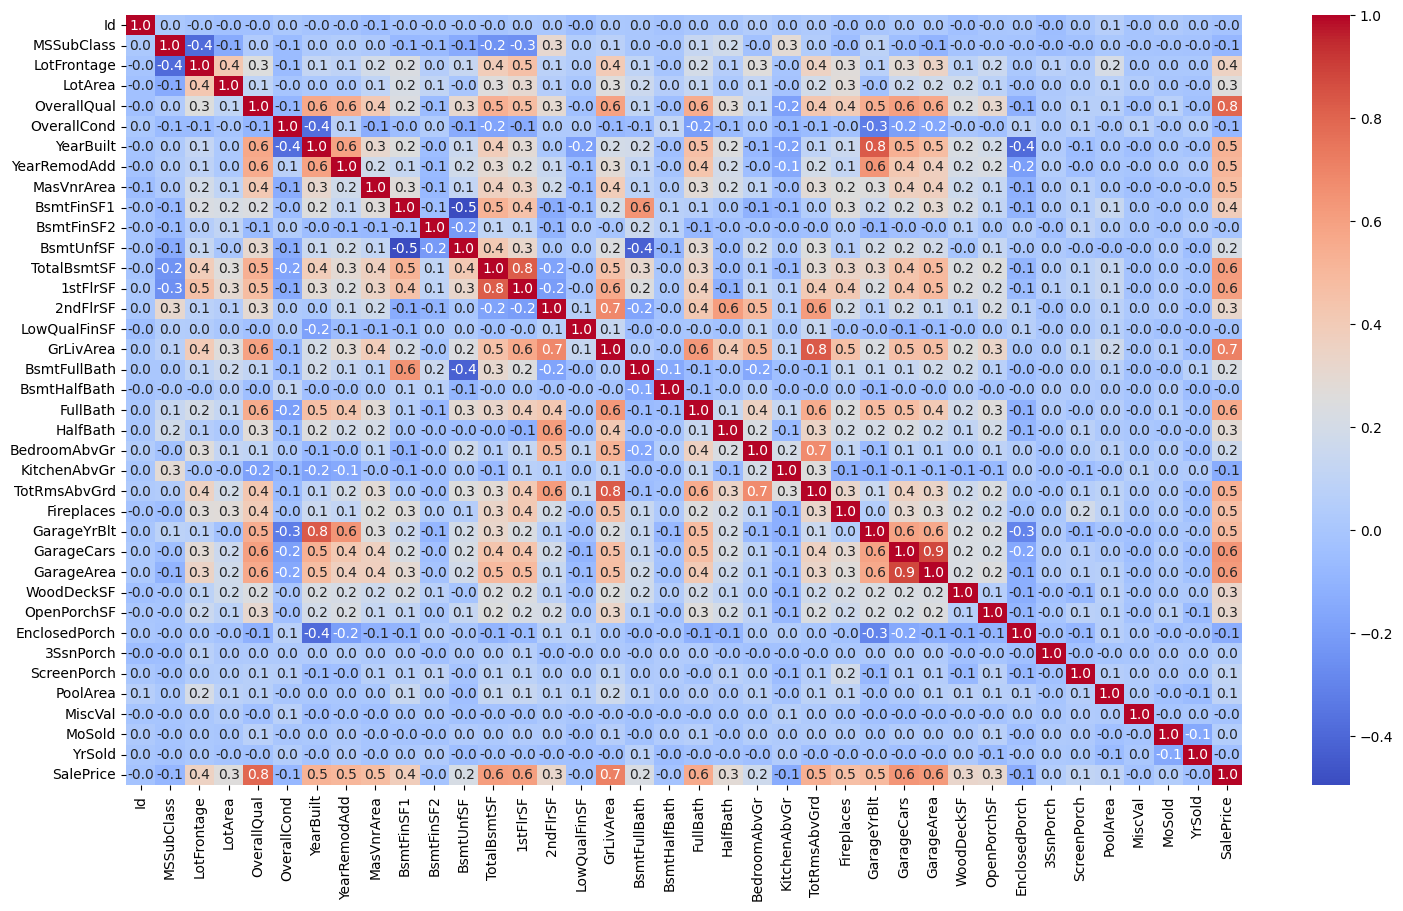

In [14]:
plt.figure(figsize=(18, 10))
correlation_matrix = train.select_dtypes("number").corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

In [15]:
# Selección de Columnas con Alta Correlación con SalePricedef
def select_high_correlation_features(df, target_variable='SalePrice', threshold=0.25):
    # Calcular la matriz de correlación
    corr_matrix = df.corr()

    # Seleccionar las columnas con una correlación mayor a |threshold| con el target_variable
    high_corr_features = corr_matrix[target_variable][abs(corr_matrix[target_variable]) > threshold].index.tolist()

    return high_corr_features

# Uso de la función
high_correlation_columns = select_high_correlation_features(train.select_dtypes("number"))
print(high_correlation_columns)


['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


In [16]:
# Seleccion de caracteristicas
train1=train[high_correlation_columns]
train2=train.select_dtypes("object")
df=pd.concat([train2,train1],axis=1)

In [17]:
# Exploración de valores nulos
missing_values = train.isnull().sum()
missing_percentage = (missing_values / train.shape[0]) * 100
missing_percentage[missing_percentage > 0]


LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [18]:
# Lista de variables a evaluar
variables = df.columns[df.isnull().any()]

# Calcular el porcentaje de valores nulos
df[variables].isnull().mean() * 100

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
LotFrontage     17.739726
MasVnrArea       0.547945
GarageYrBlt      5.547945
dtype: float64

In [19]:
# Lista de variables a eliminar
variables_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType','FireplaceQu']

# Eliminar las variables del DataFrame
train_df = df.drop(columns=variables_to_drop)

In [20]:
train_df.columns[train_df.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

In [21]:
# Imputar valores nulos
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['BsmtQual'].fillna(-1, inplace=True)
train_df['BsmtCond'].fillna(-1, inplace=True)
train_df['BsmtExposure'].fillna(-1, inplace=True)
train_df['BsmtFinType1'].fillna(-1, inplace=True)
train_df['BsmtFinType2'].fillna(-1, inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
train_df['GarageType'].fillna(-1, inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
train_df['GarageFinish'].fillna(-1, inplace=True)
train_df['GarageQual'].fillna(-1, inplace=True)
train_df['GarageCond'].fillna(-1, inplace=True)

In [ ]:
train_df.isnull().sum().sum()

0

# Valores nulos

In [22]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [23]:
# Lista de variables a evaluar
variables = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
             'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
             'MiscFeature']

# Calcular el porcentaje de valores nulos
train[variables].isnull().mean() * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

1. **LotFrontage:**

* ***Descripción:*** Frente de la propiedad en pies lineales.
* ***Relevancia:*** Probablemente influya en el valor de la propiedad, ya que una mayor fachada podría asociarse con un mayor tamaño del lote o una mejor ubicación.
* ***Acción sugerida:*** Imputar los valores nulos. La mediana podría ser una buena opción.

2. **Alley:**

* ***Descripción:*** Tipo de callejón de acceso a la propiedad (Grvl: Grava, Pave: Pavimentado).
* ***Relevancia:*** Puede tener alguna influencia en el valor de la propiedad, pero probablemente no sea muy alta.
* ***Acción sugerida:*** Evaluar si el porcentaje de valores nulos es alto. Si lo es, considerar eliminar la variable.

3. **MasVnrType:**

* ***Descripción:*** Tipo de recubrimiento de mampostería (None, BrkCmn, BrkFace, Stone).
* ***Relevancia:*** Puede influir en la estética y valor percibido de la propiedad.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

4. **MasVnrArea:**

* ***Descripción:*** Área de recubrimiento de mampostería en pies cuadrados.
* ***Relevancia:*** Similar a MasVnrType, puede influir en el valor percibido.
* ***Acción sugerida:*** Imputar los valores nulos con la mediana o cero si MasVnrType es 'None'.

5. **BsmtQual:**

* ***Descripción:*** Altura del sótano (Ex: Excelente, Gd: Buena, TA: Promedio, Fa: Pobre, Po: Muy Pobre).
* ***Relevancia:*** La calidad del sótano tiene un impacto significativo en el valor de la propiedad.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

6. **BsmtCond:**

* ***Descripción:*** Condición general del sótano.
* ***Relevancia:*** Similar a BsmtQual, influye en el valor de la propiedad.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

7. **BsmtExposure:**

* ***Descripción:*** Exposición del sótano al jardín (Gd: Buena, Av: Promedio, Mn: Mínima, No: Ninguna).
* ***Relevancia:*** Puede influir en el atractivo del sótano.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

8.**BsmtFinType1:**

* ***Descripción:*** Calidad del acabado del área tipo 1 del sótano (GLQ: Buena calidad, Unf: Sin terminar, etc.).
* ***Relevancia:*** Influye en el uso y valor del espacio del sótano.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

9. **BsmtFinType2:**

* ***Descripción:*** Calidad del acabado del área tipo 2 del sótano.
* ***Relevancia:*** Similar a BsmtFinType1, pero generalmente menos importante.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

10. **Electrical:**

* ***Descripción:*** Sistema eléctrico (SBrkr: Interruptores, FuseA: Fusibles tipo A, etc.).
* ***Relevancia:*** Un sistema eléctrico moderno puede influir en la seguridad y el valor.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

11. **FireplaceQu:**

* ***Descripción:*** Calidad de la chimenea.
* ***Relevancia:*** Las chimeneas pueden aumentar el valor y atractivo de una propiedad.
* ***Acción sugerida:*** Imputar los valores nulos con 'No Fireplace' o una categoría específica si es aplicable.

12. **GarageType:**

* ***Descripción:*** Ubicación del garaje (Attached, Detached, etc.).
* ***Relevancia:*** Los garajes son importantes para la conveniencia y seguridad.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

13. **GarageYrBlt:**

* ***Descripción:*** Año de construcción del garaje.
* ***Relevancia:*** Puede indicar la modernidad del garaje.
* ***Acción sugerida:*** Imputar los valores nulos con la mediana o el año de construcción de la casa.

14. **GarageFinish:**

* ***Descripción:*** Acabado del interior del garaje.
* ***Relevancia:*** Puede influir en la utilidad y estética del garaje.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

15. **GarageQual:**

* ***Descripción:*** Calidad del garaje.
* ***Relevancia:*** Similar a GarageFinish, influye en el valor del garaje.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

16. **GarageCond:**

* ***Descripción:*** Condición del garaje.
* ***Relevancia:*** Similar a GarageQual, influye en el valor del garaje.
* ***Acción sugerida:*** Imputar los valores nulos con la categoría más frecuente.

17. **PoolQC:**

* ***Descripción:*** Calidad de la piscina.
* ***Relevancia:*** Las piscinas pueden ser un lujo significativo.
* ***Acción sugerida:*** Si hay pocos valores nulos, considerarlos como 'No Pool'.

18. **Fence:**

* ***Descripción:*** Calidad de la cerca.
* ***Relevancia:*** Puede influir en la privacidad y seguridad, aunque generalmente tiene un impacto menor.
* ***Acción sugerida:*** Imputar los valores nulos con 'No Fence'.

19. **MiscFeature:**

* ***Descripción:*** Características misceláneas no cubiertas en otras categorías.
* ***Relevancia:*** Puede incluir características diversas que añaden valor.
* ***Acción sugerida:*** Evaluar el porcentaje de valores nulos y decidir si imputar con 'None' o eliminar la variable.

In [24]:
# Lista de variables a eliminar
variables_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType','FireplaceQu']

# Eliminar las variables del DataFrame
train_df = df.drop(columns=variables_to_drop)

In [25]:
train_df.columns[train_df.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

In [26]:
# Imputar valores nulos
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['BsmtQual'].fillna(-1, inplace=True)
train_df['BsmtCond'].fillna(-1, inplace=True)
train_df['BsmtExposure'].fillna(-1, inplace=True)
train_df['BsmtFinType1'].fillna(-1, inplace=True)
train_df['BsmtFinType2'].fillna(-1, inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)
train_df['GarageType'].fillna(-1, inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
train_df['GarageFinish'].fillna(-1, inplace=True)
train_df['GarageQual'].fillna(-1, inplace=True)
train_df['GarageCond'].fillna(-1, inplace=True)

In [27]:
train_df.isnull().sum().sum()

0

#Imputacion

In [28]:
# Imputar valores nulos
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace=True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0], inplace=True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0], inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0], inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['FireplaceQu'].fillna('No Fireplace', inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0], inplace=True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace=True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace=True)
train['PoolQC'].fillna('No Pool', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['MiscFeature'].fillna('None', inplace=True)

In [29]:
#train_df_no_outliers.select_dtypes(include=['object']).columns.tolist()
train_df.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [30]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    # Lista de variables a codificar
    categorical_vars = [
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'
    ]

    # Crear un diccionario para almacenar los mapeos
    encoding_map = {}
    encoder = LabelEncoder()

    # Codificar las variables
    for col in categorical_vars:
        df[col] = encoder.fit_transform(df[col].astype(str))
        encoding_map[col] = dict(zip(encoder.classes_, range(len(encoder.classes_))))

    return df, encoding_map

# Uso de la función
processed_df, encodings = encode_categorical_features(train_df)

In [31]:
processed_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2,1,8,0,2003.0,2,548,0,61,208500
1,3,1,3,3,0,2,0,24,1,2,...,2,0,6,1,1976.0,2,460,298,0,181500
2,3,1,0,3,0,4,0,5,2,2,...,2,1,6,1,2001.0,2,608,0,42,223500
3,3,1,0,3,0,0,0,6,2,2,...,1,0,7,1,1998.0,3,642,0,35,140000
4,3,1,0,3,0,2,0,15,2,2,...,2,1,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,2,1,7,1,1999.0,2,460,0,40,175000
1456,3,1,3,3,0,4,0,14,2,2,...,2,0,7,2,1978.0,2,500,349,0,210000
1457,3,1,3,3,0,4,0,6,2,2,...,2,0,9,2,1941.0,1,252,0,60,266500
1458,3,1,3,3,0,4,0,12,2,2,...,1,0,5,0,1950.0,1,240,366,0,142125


In [32]:
# Mostrar los mapeos
for col, mapping in encodings.items():
    print(f"{col}: {mapping}")

MSZoning: {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
Street: {'Grvl': 0, 'Pave': 1}
LotShape: {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
LandContour: {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Utilities: {'AllPub': 0, 'NoSeWa': 1}
LotConfig: {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
LandSlope: {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood: {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Condition1: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Condition2: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}
BldgType: {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, '

In [33]:
# Mostrar las primeras filas del DataFrame final
train_df_final=processed_df.copy()
train_df_final.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2,1,8,0,2003.0,2,548,0,61,208500
1,3,1,3,3,0,2,0,24,1,2,...,2,0,6,1,1976.0,2,460,298,0,181500
2,3,1,0,3,0,4,0,5,2,2,...,2,1,6,1,2001.0,2,608,0,42,223500
3,3,1,0,3,0,0,0,6,2,2,...,1,0,7,1,1998.0,3,642,0,35,140000
4,3,1,0,3,0,2,0,15,2,2,...,2,1,9,1,2000.0,3,836,192,84,250000


# test

In [41]:
train_df_final.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [42]:
# Eliminar las variables del DataFrame
test_df = test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF']]

In [43]:
test_df.columns[test_df.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [44]:
# def impute_missing_values(df):
#     # Imputación de valores categóricos con moda
#     categorical_vars = [
#         'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
#         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#         'BsmtFinType2', 'KitchenQual', 'Functional',
#         'GarageType', 'GarageFinish', 'GarageQual',
#         'GarageCond', 'SaleType'
#     ]

#     for col in categorical_vars:
#         df[col].fillna(df[col].mode()[0], inplace=True)

#     # Imputación de valores numéricos
#     df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
#     df['MasVnrArea'].fillna(0, inplace=True)
#     df['BsmtFinSF1'].fillna(0, inplace=True)
#     df['TotalBsmtSF'].fillna(0, inplace=True)
#     df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
#     df['GarageCars'].fillna(0, inplace=True)
#     df['GarageArea'].fillna(0, inplace=True)

#     return df

In [45]:
# Imputar valores nulos
test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(), inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['BsmtQual'].fillna(-1, inplace=True)
test_df['BsmtCond'].fillna(-1, inplace=True)
test_df['BsmtExposure'].fillna(-1, inplace=True)
test_df['BsmtFinType1'].fillna(-1, inplace=True)
test_df['BsmtFinType2'].fillna(-1, inplace=True)
test_df['Electrical'].fillna(test_df['Electrical'].mode()[0], inplace=True)
test_df['GarageType'].fillna(-1, inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median(), inplace=True)
test_df['GarageFinish'].fillna(-1, inplace=True)
test_df['GarageQual'].fillna(-1, inplace=True)
test_df['GarageCond'].fillna(-1, inplace=True)

In [46]:
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0], inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0], inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0], inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0], inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0], inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0], inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0], inplace=True)
test_df['BsmtFinSF1'].fillna(0, inplace=True)
test_df['TotalBsmtSF'].fillna(0, inplace=True)
test_df['GarageCars'].fillna(0, inplace=True)
test_df['GarageArea'].fillna(0, inplace=True)

In [47]:
# test_df=impute_missing_values(test_df)

In [48]:
test_df.isnull().sum().sum()

0

In [49]:
def apply_encoding(test_df, encoding_map):
    # Aplicar los mapeos al conjunto de test
    for col, mapping in encoding_map.items():
        test_df[col] = test_df[col].map(mapping).fillna(-1).astype(int)  # -1 para categorías no vistas

    return test_df

# Uso de la función
processed_test_df = apply_encoding(test_df, encodings)

In [50]:
processed_test_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,2,1,3,3,0,4,0,12,1,2,...,896,1,0,5,0,1961.0,1.0,730.0,140,0
1,3,1,0,3,0,0,0,12,2,2,...,1329,1,1,6,0,1958.0,1.0,312.0,393,36
2,3,1,0,3,0,4,0,8,2,2,...,1629,2,1,6,1,1997.0,2.0,482.0,212,34
3,3,1,0,3,0,4,0,8,2,2,...,1604,2,1,7,1,1998.0,2.0,470.0,360,36
4,3,1,0,1,0,4,0,22,2,2,...,1280,2,0,5,0,1992.0,2.0,506.0,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,1092,1,1,5,0,1979.0,0.0,0.0,0,0
1455,4,1,3,3,0,4,0,10,2,2,...,1092,1,1,6,0,1970.0,1.0,286.0,0,24
1456,3,1,3,3,0,4,0,11,2,2,...,1224,1,0,7,1,1960.0,2.0,576.0,474,0
1457,3,1,3,3,0,4,0,11,2,2,...,970,1,0,6,0,1979.0,0.0,0.0,80,32


In [51]:
# Hacer predicciones en el conjunto de validación
preds = gb_rlf.predict(processed_test_df)

In [52]:
# Create submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': preds
})
submission.to_csv('submission.csv', index=False)

In [53]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 17.82it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.616197 -> initscore=0.473438
[LightGBM] [Info] Start training from score 0.473438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [54]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

#Instead of using the Boston dataset, we will use the California housing dataset
california = datasets.fetch_california_housing()
X, y = shuffle(california.data, california.target, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 74%|███████▍  | 31/42 [06:23<00:52,  4.81s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [06:58<00:03,  3.34s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 18576, number of used features: 8
[LightGBM] [Info] Start training from score 2.063611


100%|██████████| 42/42 [06:58<00:00,  9.97s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.84       0.84  0.48        0.64
XGBRegressor                                 0.84       0.84  0.48        0.48
LGBMRegressor                                0.83       0.83  0.48        0.30
ExtraTreesRegressor                          0.82       0.82  0.50        5.11
RandomForestRegressor                        0.82       0.82  0.50       16.06
BaggingRegressor                             0.80       0.80  0.53        2.21
GradientBoostingRegressor                    0.78       0.78  0.55        5.92
MLPRegressor                                 0.78       0.78  0.56       24.09
NuSVR                                        0.75       0.75  0.59       24.43
SVR                                          0.74       0.74  0.60       17.64
KNeighborsRegressor                          0.70   

# Entrenamiento de modelos de machine learning
Para entrenar un modelo de regresión clasificacion



#Ajuste de Modelos con Grid Search

In [152]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de columnas numéricas y categóricas
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Pipeline para columnas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Aplicar el preprocesamiento a los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [153]:
# RidgeClassifierCV
ridge_cv = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
ridge_cv_best = ridge_cv.alpha_
print(f"Best alpha for RidgeClassifierCV: {ridge_cv_best}")

# RidgeClassifier
param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge = RidgeClassifier()
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_

# KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# BernoulliNB
param_grid = {'alpha': [0.5, 1.0, 2.0]}
bernoulli_nb = BernoulliNB()
grid_search_bernoulli_nb = GridSearchCV(estimator=bernoulli_nb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_bernoulli_nb.fit(X_train, y_train)
best_bernoulli_nb = grid_search_bernoulli_nb.best_estimator_

# LinearDiscriminantAnalysis
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}
lda = LinearDiscriminantAnalysis()
grid_search_lda = GridSearchCV(estimator=lda, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_lda.fit(X_train, y_train)
best_lda = grid_search_lda.best_estimator_

# GaussianNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
best_gaussian_nb = gaussian_nb

# NuSVC
param_grid = {'nu': [0.1, 0.5, 0.9], 'kernel': ['linear', 'poly', 'rbf']}
nusvc = NuSVC()
grid_search_nusvc = GridSearchCV(estimator=nusvc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_nusvc.fit(X_train, y_train)
best_nusvc = grid_search_nusvc.best_estimator_

# ExtraTreeClassifier
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
extra_tree = ExtraTreeClassifier()
grid_search_extra_tree = GridSearchCV(estimator=extra_tree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_extra_tree.fit(X_train, y_train)
best_extra_tree = grid_search_extra_tree.best_estimator_

# NearestCentroid
param_grid = {'metric': ['euclidean', 'manhattan', 'cosine']}
nearest_centroid = NearestCentroid()
grid_search_nearest_centroid = GridSearchCV(estimator=nearest_centroid, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_nearest_centroid.fit(X_train, y_train)
best_nearest_centroid = grid_search_nearest_centroid.best_estimator_

# DecisionTreeClassifier
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
decision_tree = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_

# DummyClassifier
param_grid = {'strategy': ['most_frequent', 'stratified', 'uniform']}
dummy = DummyClassifier()
grid_search_dummy = GridSearchCV(estimator=dummy, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_dummy.fit(X_train, y_train)
best_dummy = grid_search_dummy.best_estimator_

# Lista de modelos ajustados
models = {
    'RidgeClassifierCV': ridge_cv,
    'RidgeClassifier': best_ridge,
    'KNeighborsClassifier': best_knn,
    'BernoulliNB': best_bernoulli_nb,
    'LinearDiscriminantAnalysis': best_lda,
    'GaussianNB': best_gaussian_nb,
    'NuSVC': best_nusvc,
    'ExtraTreeClassifier': best_extra_tree,
    'NearestCentroid': best_nearest_centroid,
    'DecisionTreeClassifier': best_decision_tree,
    'DummyClassifier': best_dummy
}

# Evaluación de los modelos
for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} accuracy: {accuracy}")


Best alpha for RidgeClassifierCV: 10.0
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
RidgeClassifierCV accuracy: 0.010273972602739725
RidgeClassifier accuracy: 0.010273972602739725
KNeighborsClassifier accuracy: 0.003424657534246575
BernoulliNB accuracy: 0.00684931506849315
LinearDiscriminantAnalysis accuracy: 0.010273972602739725
GaussianNB accuracy: 0.017123287671232876
NuSVC accuracy: 0.00684931506849315
ExtraTreeClassifier accuracy: 0.003424657534246575
NearestCentroid accuracy: 0.003424657534246575

#Función para Graficar Predicciones vs Valores Reales

In [150]:
def plot_predictions_vs_real(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Valores Reales - {model_name}')
    plt.show()



#Visualización para Cada Modelo

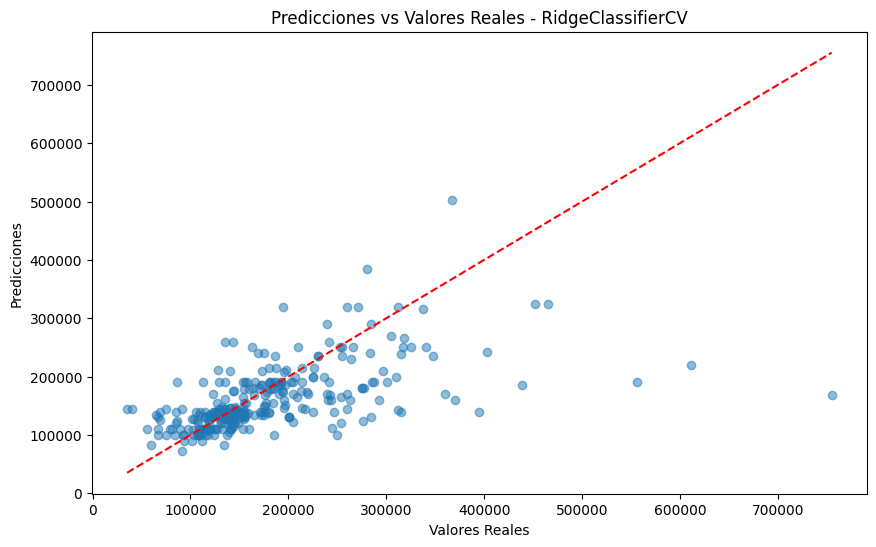

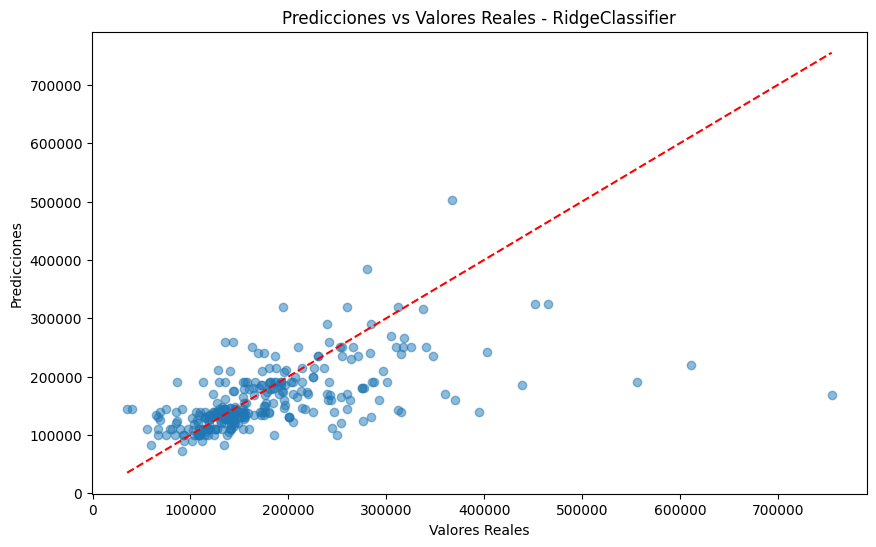

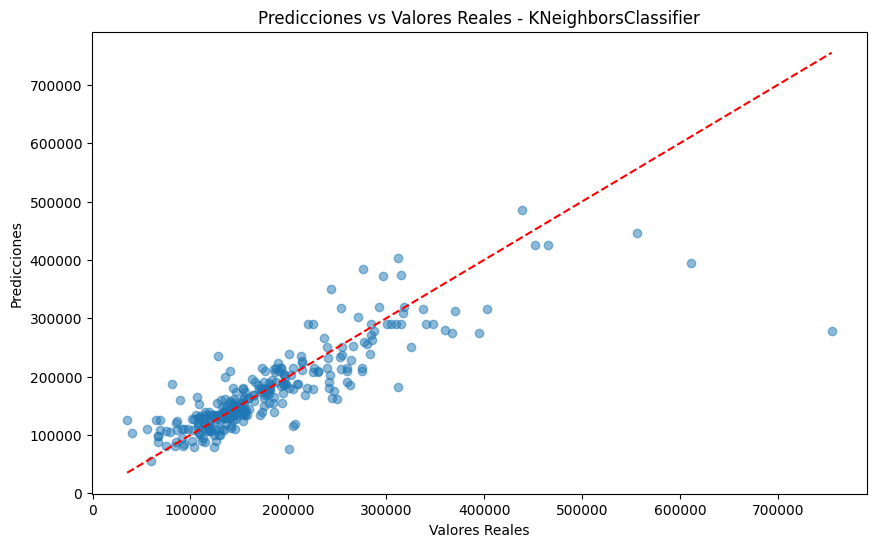

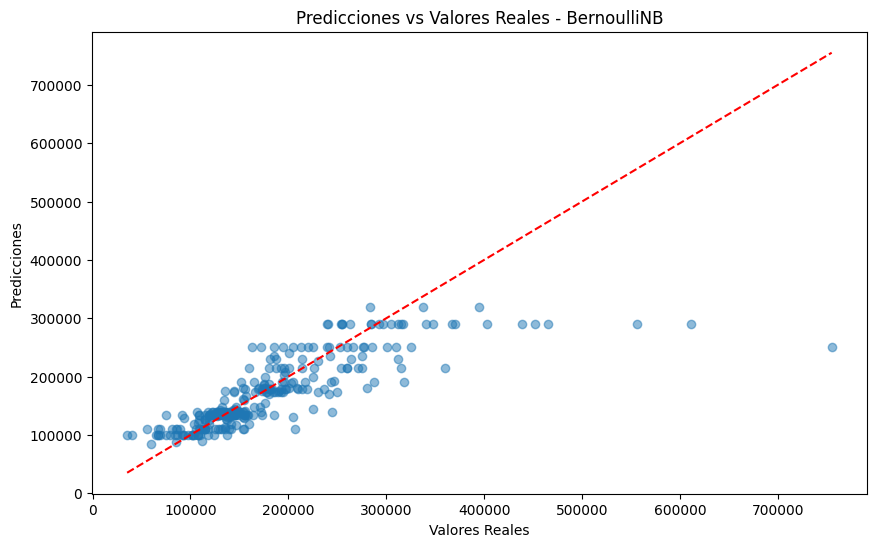

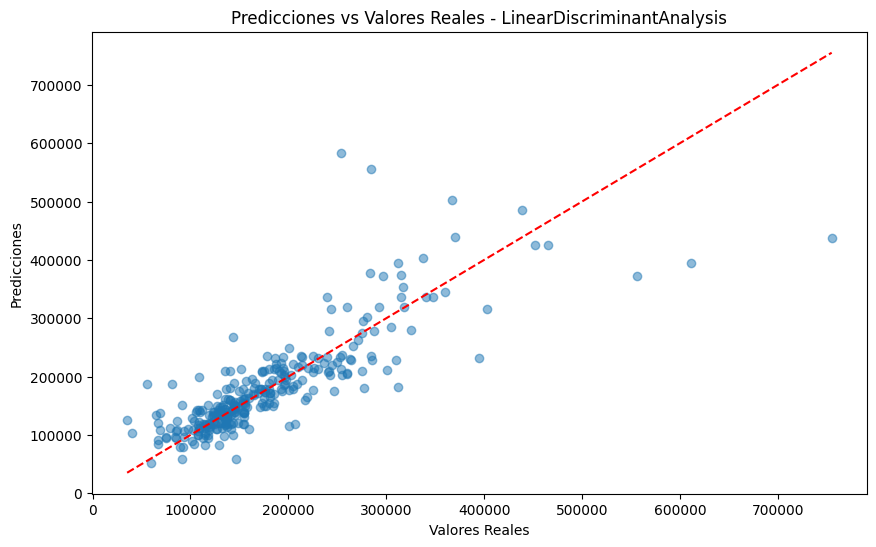

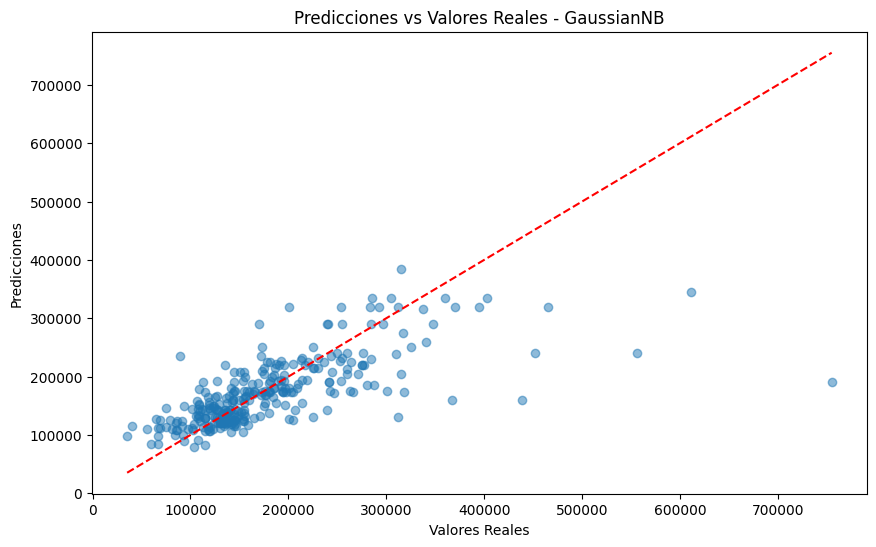

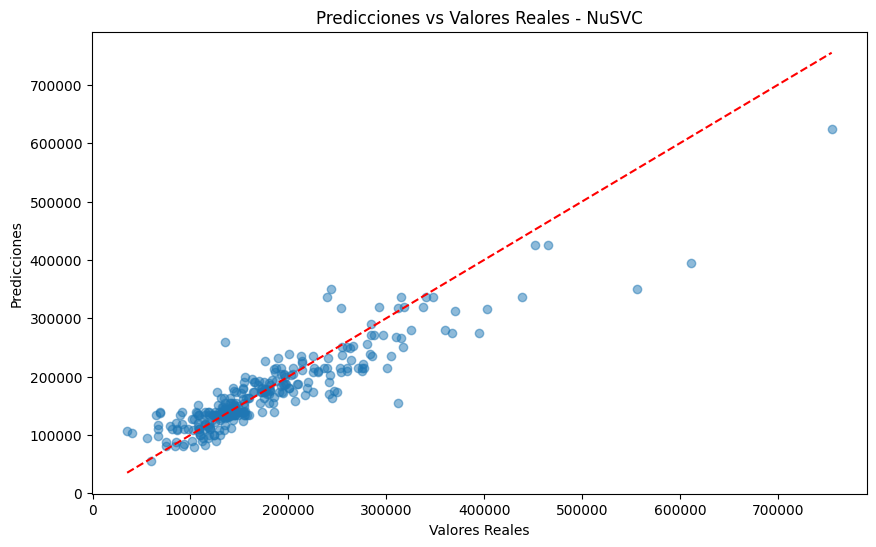

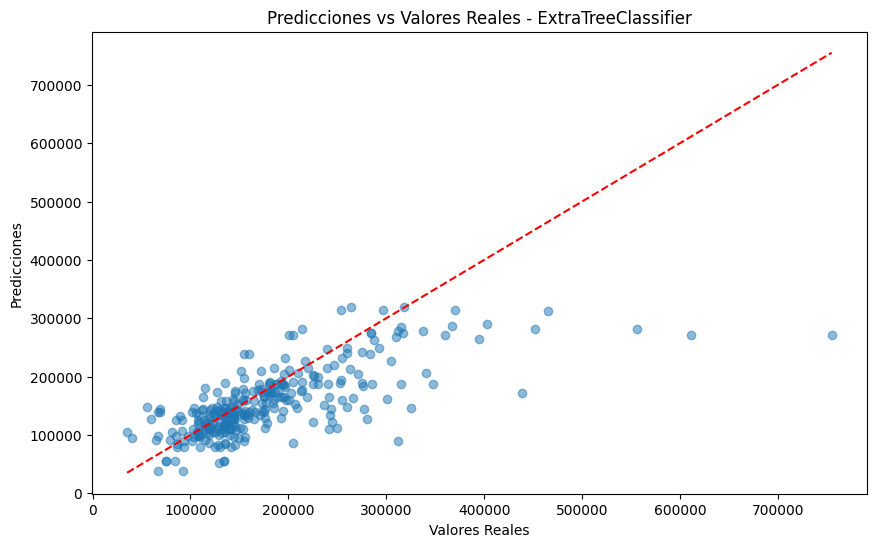

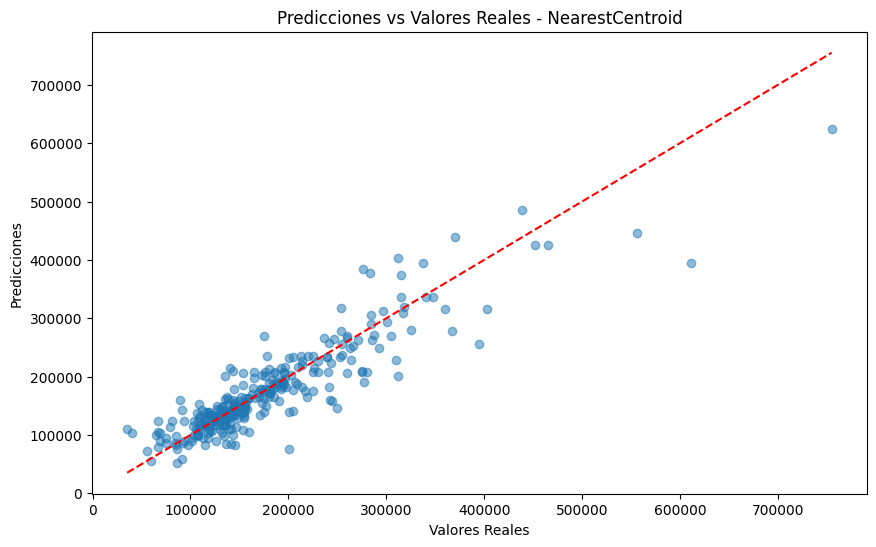

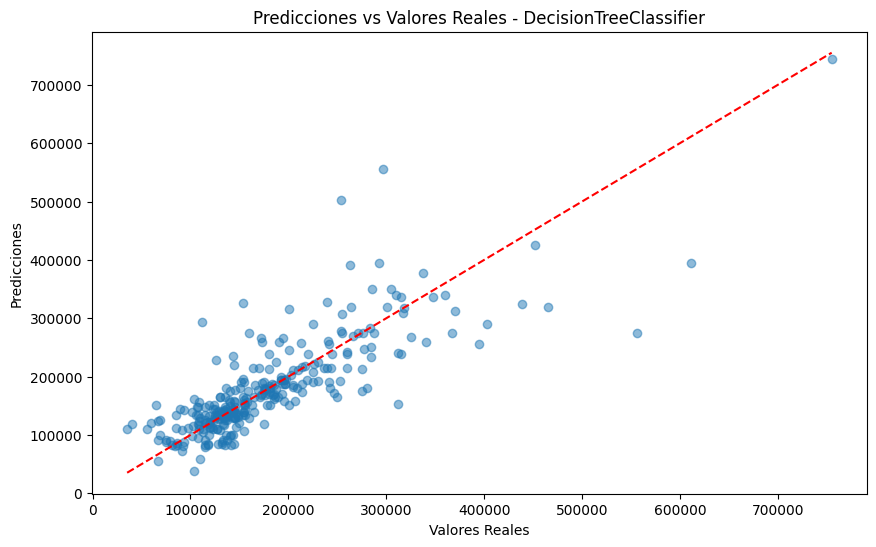

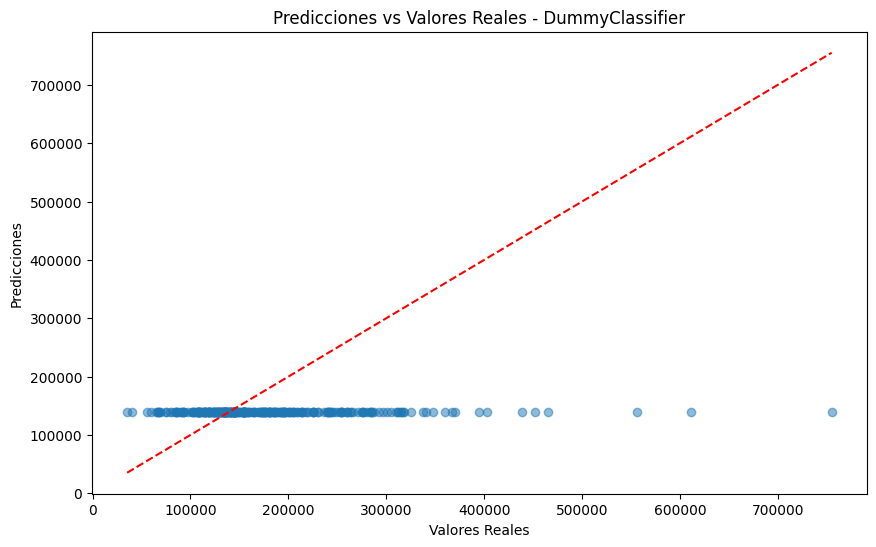

In [151]:
for name, model in models.items():
    # Graficar Predicciones vs Valores Reales
    plot_predictions_vs_real(model, X_test, y_test, name)




